**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Jessica López García.

---





*   MATRÍCULA: 01795373

---




En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

In [ ]:
import pandas as pd

air_df = pd.read_csv('LaqnData.csv')
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


In [ ]:
# Observa las últimas filas del DataFrame
air_df.tail()


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [ ]:
# Verifica la forma del DataFrame (número de filas y columnas)
air_df.shape


(43800, 6)

In [ ]:
# Comprueba los tipos de datos de cada columna
air_df.dtypes


Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [ ]:
# Calcula el porcentaje de valores faltantes por columna
(air_df.isna().sum() / len(air_df)) * 100


Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      7.374429
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [ ]:
num_mediciones = air_df['ReadingDateTime'].nunique()
print(f"Se hicieron {num_mediciones} mediciones.")


Se hicieron 8760 mediciones.


In [ ]:
num_contaminantes = air_df['Species'].nunique()
print(f"Se analizaron {num_contaminantes} contaminantes del aire.")


Se analizaron 5 contaminantes del aire.


In [ ]:
columnas_sin_valor = air_df.columns[air_df.nunique() == 1]
print(f"Columnas sin valor informativo: {columnas_sin_valor.tolist()}")

# Elimina esas columnas del dataframe
air_df = air_df.drop(columns=columnas_sin_valor)


Columnas sin valor informativo: ['Site', 'Provisional or Ratified']


In [ ]:
valores_units = air_df['Units'].unique()
print(f"Valores únicos en la columna Units: {valores_units}")

# Si solo hay un valor único, puedes eliminar la columna
if len(valores_units) == 1:
    air_df = air_df.drop(columns=['Units'])


Valores únicos en la columna Units: ['ug m-3' 'ug m-3 as NO2' 'ug/m3']


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [ ]:
conteo_species = air_df['Species'].value_counts()
print(conteo_species)

# Ahora, compara con el total de mediciones
total_mediciones = air_df['ReadingDateTime'].nunique()
for specie, count in conteo_species.items():
    if count == total_mediciones:
        print(f"Las mediciones para el contaminante {specie} coinciden con el total de mediciones.")
    else:
        print(f"Las mediciones para el contaminante {specie} NO coinciden con el total de mediciones. Falta(n) {total_mediciones - count} mediciones.")


NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
Las mediciones para el contaminante NO coinciden con el total de mediciones.
Las mediciones para el contaminante NO2 coinciden con el total de mediciones.
Las mediciones para el contaminante NOX coinciden con el total de mediciones.
Las mediciones para el contaminante PM10 coinciden con el total de mediciones.
Las mediciones para el contaminante PM2.5 coinciden con el total de mediciones.


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [ ]:
promedio_contaminantes = air_df.groupby('Species')['Value'].mean()
print(promedio_contaminantes)


Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [ ]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
print(pvt_df.head())  # Mostrando las primeras filas para verificar el resultado


Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [ ]:
max_NO2 = pvt_df['NO2'].max()
fecha_max_NO2 = pvt_df['NO2'].idxmax()  # Obtener el índice (fecha) donde se registró el máximo valor
print(f"El mayor valor de NO2 es {max_NO2} registrado el {fecha_max_NO2}.")


El mayor valor de NO2 es 120.2 registrado el 24/01/2017 19:00.


In [ ]:
min_PM10 = pvt_df['PM10'].min()
fecha_min_PM10 = pvt_df['PM10'].idxmin()
print(f"El menor valor de PM10 es {min_PM10} registrado el {fecha_min_PM10}.")


El menor valor de PM10 es -5.6 registrado el 12/09/2017 23:00.


In [ ]:
mediana_NO = pvt_df['NO'].median()
print(f"La mediana del NO es {mediana_NO}.")


La mediana del NO es 7.1.


In [ ]:
primer_cuartil_PM25 = pvt_df['PM2.5'].quantile(0.25)
print(f"El primer cuartil de PM2.5 es {primer_cuartil_PM25}.")


El primer cuartil de PM2.5 es 7.0.


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

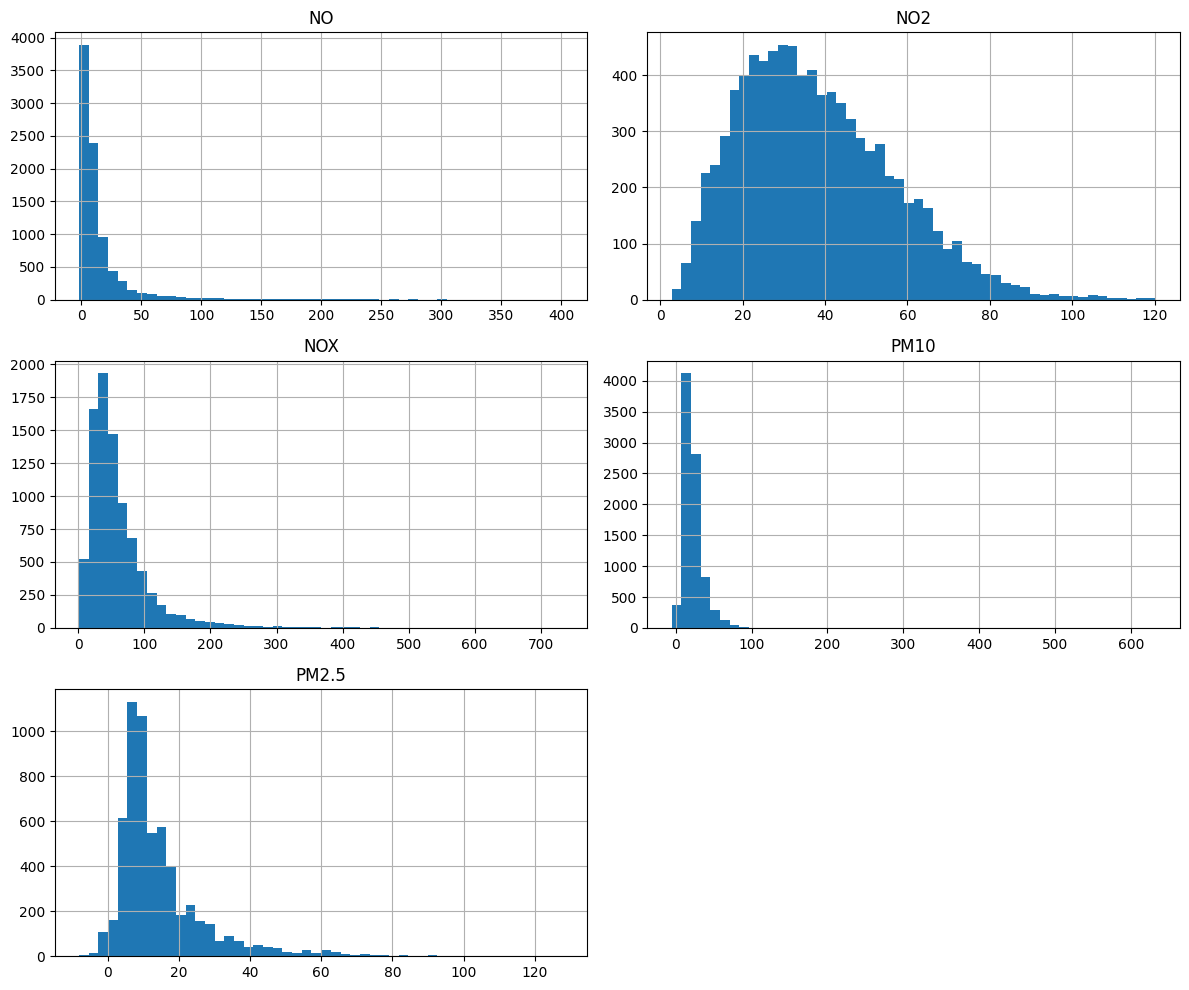

In [ ]:
import matplotlib.pyplot as plt

# Dibujar histogramas
pvt_df.hist(figsize=(12, 10), bins=50)
plt.tight_layout()
plt.show()


In [ ]:
pip install matplotlib numpy


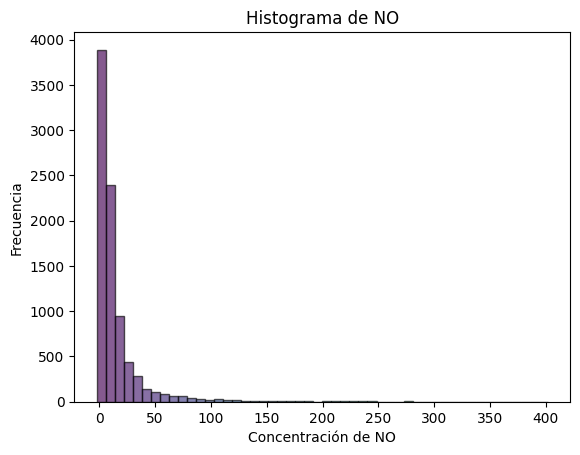

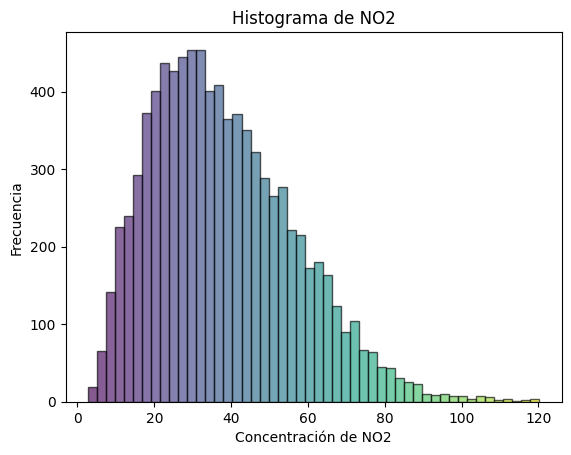

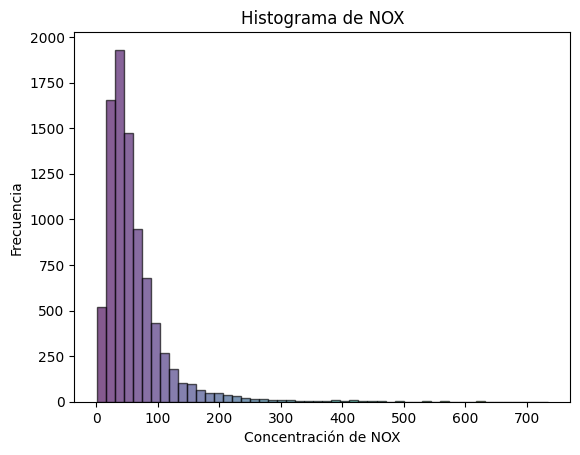

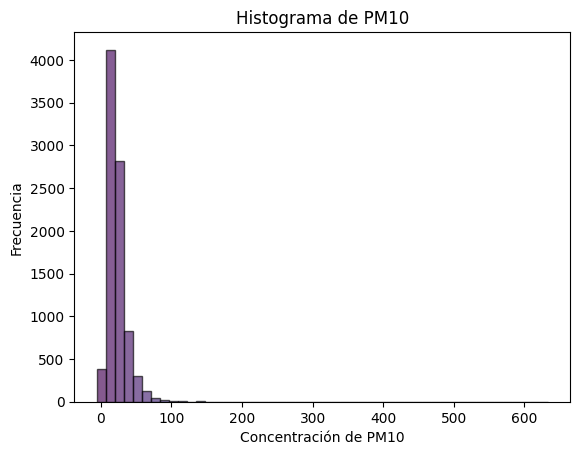

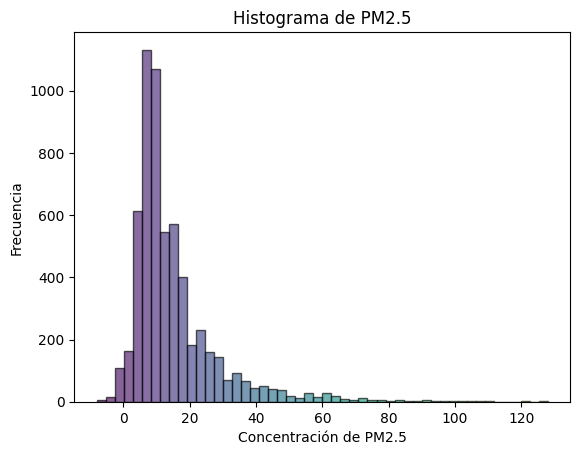

In [ ]:
def plot_colored_histogram(data, title, xlabel):
    n, bins, patches = plt.hist(data, bins=50, edgecolor="k", alpha=0.65)
    for i in range(50):
        patches[i].set_facecolor(plt.cm.viridis(i*5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.show()

contaminantes = ['NO', 'NO2', 'NOX', 'PM10', 'PM2.5']
for contaminante in contaminantes:
    plot_colored_histogram(pvt_df[contaminante], f'Histograma de {contaminante}', f'Concentración de {contaminante}')


8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [ ]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
date_df
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value   Units
Month Day Time  Species               
01    01  00:00 NO         3.5  ug m-3
          01:00 NO         3.6  ug m-3
          02:00 NO         2.2  ug m-3
          03:00 NO         2.1  ug m-3
          04:00 NO         3.3  ug m-3
...                        ...     ...
12    31  19:00 PM2.5     -2.0  ug m-3
          20:00 PM2.5      6.0  ug m-3
          21:00 PM2.5      5.0  ug m-3
          22:00 PM2.5      5.0  ug m-3
          23:00 PM2.5      6.0  ug m-3

[43800 rows x 2 columns]

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(air_df, *['Value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(air_df, *['Value'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(air_df, *['Units'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(air_df, *['Value', 'Units'], **{'inner': 'box'})
chart

Este código transforma y reorganiza el dataframe air_df para facilitar el acceso a las mediciones por fecha, hora y especie.

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [ ]:
air_df.unstack()

Value                           Units                         \
Species            NO   NO2   NOX  PM10 PM2.5      NO     NO2            NOX   
Month Day Time                                                                 
01    01  00:00   3.5  30.8  36.2  35.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          01:00   3.6  31.5  37.0  28.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          02:00   2.2  27.3  30.7  22.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          03:00   2.1  23.5  26.8  20.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          04:00   3.3  28.0  33.0  22.1   NaN  ug m-3  ug m-3  ug m-3 as NO2   
...               ...   ...   ...   ...   ...     ...     ...            ...   
12    31  19:00   0.7  17.5  18.5  16.3  -2.0  ug m-3  ug m-3  ug m-3 as NO2   
          20:00   0.7  17.5  18.6  14.5   6.0  ug m-3  ug m-3  ug m-3 as NO2   
          21:00   0.7  14.1  15.1   8.6   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          22:00   1.1  22.0  23.6  12.5   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          23:00   0.9  19.4  20.7  10.4   6.0  ug m-3  ug m-3  ug m-3 as NO2   

                                
Species           PM10   PM2.5  
Month Day Time                  
01    01  00:00  ug/m3  ug m-3  
          01:00  ug/m3  ug m-3  
          02:00  ug/m3  ug m-3  
          03:00  ug/m3  ug m-3  
          04:00  ug/m3  ug m-3  
...                ...     ...  
12    31  19:00  ug/m3  ug m-3  
          20:00  ug/m3  ug m-3  
          21:00  ug/m3  ug m-3  
          22:00  ug/m3  ug m-3  
          23:00  ug/m3  ug m-3  

[8760 rows x 10 columns]

En el ejercicio 8 se organizan los datos por columnas en fecha y hora usando "ReadingDataTime", por componentes separados, posterior a eso se reorganiza el dataframe para acceder a los datos de una forma más refinada e intuitiva.

En el ejercicio 9 se usa "unstack()" usando los contaminantes y separando en columnas, pasando de tener species como parte del índice a tener columnas, por lo anterior la versión 9 será un pivote de la versión 8, lo que no es exactamente igual.

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt() vs. Pivot(): Ambas funciones se utilizan para transformar dataframes entre formatos largo y ancho. melt() convierte un dataframe de formato ancho a largo al "derretir" columnas en un par clave-valor, mientras que pivot() realiza la operación inversa, transformando datos largos en un formato ancho. La principal diferencia radica en su aplicación: melt() es para desagregar columnas y pivot() para reagruparlas.

Stack() vs. Unstack(): Estas funciones trabajan específicamente con índices multinivel de un dataframe. stack() mueve data desde columnas a filas, compactando el dataframe en un formato más largo, mientras que unstack() realiza la operación inversa, desplazando datos de las filas a las columnas y produciendo un formato más ancho. Aunque ambas tratan con índices multinivel, la diferencia clave es en la dirección del movimiento: vertical con stack() y horizontal con unstack().

Si se tuviera que elegir una contraparte para .melt(), elegiría .stack() ya que ambas operaciones transforman un DataFrame de un formato ancho a uno largo.